(60000, 784)
(10000, 784)
Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.5107 - accuracy: 0.8583
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1923 - accuracy: 0.9450
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1449 - accuracy: 0.9573
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1203 - accuracy: 0.9645
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1012 - accuracy: 0.9702
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0867 - accuracy: 0.9742
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0772 - accuracy: 0.9768
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0673 - accuracy: 0.9799
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0601 - accuracy: 0.9819
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss:

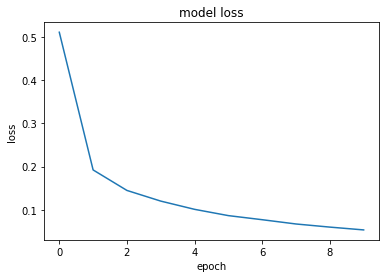

313/313 [==============================] - 0s 1ms/step - loss: 0.0876 - accuracy: 0.9746
[0.08755180984735489, 0.9746000170707703]
[[4.6099106e-07 6.3323017e-07 1.7712807e-03 9.3489951e-03 8.4496854e-11
  1.1678985e-06 2.3280741e-12 9.8883086e-01 4.5386310e-05 1.2552147e-06]
 [1.1493064e-09 5.6377526e-06 9.9998009e-01 1.3766842e-05 4.3505048e-12
  1.0827983e-08 1.1209431e-09 2.7085244e-11 4.4784309e-07 2.3193100e-15]
 [3.1185220e-07 9.9815279e-01 4.7476182e-04 1.3195560e-04 1.3540947e-04
  3.8896919e-06 2.1134530e-05 8.3053636e-04 2.4565388e-04 3.4526154e-06]
 [9.9966073e-01 1.4318930e-08 1.1247722e-04 6.2218794e-07 7.1218751e-06
  2.0810271e-06 2.3907231e-05 1.9137654e-04 4.2416239e-08 1.6309543e-06]
 [3.6683567e-05 1.7123762e-07 7.6557335e-05 6.2861778e-07 9.4707787e-01
  1.3036832e-06 7.3877709e-06 1.0530455e-03 9.8514647e-06 5.1736429e-02]]
[7 2 1 0 4]
[7 2 1 0 4]
(120000, 784)
(20000, 784)
Epoch 1/20
60/60 [==============================] - 1s 19ms/step - loss: 1.7982 - accuracy: 

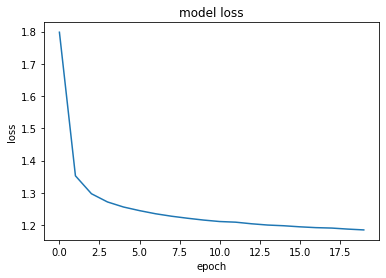

[[1.3195167e-06 3.0998739e-09 1.0824408e-05 4.1645119e-04 1.0953250e-06
  2.8568614e-08 4.1583577e-12 9.9955302e-01 2.4130254e-06 1.4863887e-05]
 [8.8384570e-07 8.6502558e-05 9.9857676e-01 2.9803606e-04 2.6544162e-09
  1.0197689e-03 4.1471403e-06 3.9633754e-09 1.3919765e-05 1.0619689e-10]
 [2.8537155e-05 9.9554896e-01 1.2114818e-03 1.6349772e-04 6.3201814e-04
  5.1788571e-05 5.4666252e-05 1.5499833e-03 7.1961916e-04 3.9407234e-05]
 [9.9903917e-01 1.0937632e-06 4.8666925e-04 9.9931776e-06 2.1178621e-06
  9.2306705e-05 1.2156576e-05 3.1647220e-04 3.5451315e-08 4.0117833e-05]
 [4.2963526e-05 5.2660744e-07 3.0766550e-05 3.5633520e-06 9.9863380e-01
  6.4650367e-06 2.3046226e-05 2.3846976e-04 8.0606051e-06 1.0123454e-03]]
[7 2 1 0 4]
[7 2 1 0 4]


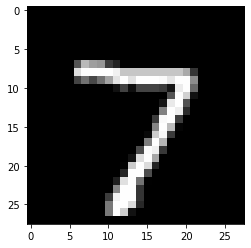

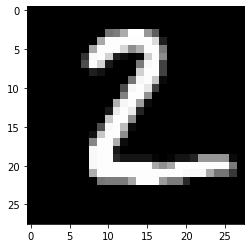

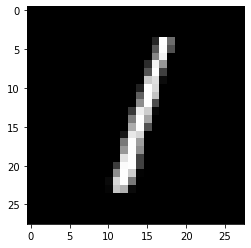

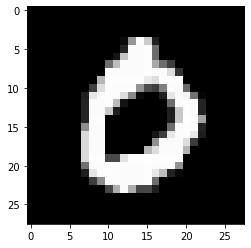

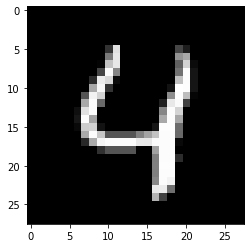

In [ ]:
!pip install mnist
import tensorflow
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

#Load dataset
train_images=mnist.train_images()
train_labels=mnist.train_labels()
test_images=mnist.test_images()
test_labels=mnist.test_labels()

#Normalising the dataset
train_images=train_images/255.0
test_images=test_images/255.0

#Flattening the images
train_images=train_images.reshape((-1,784))
test_images=test_images.reshape((-1,784))

#Printing the Shape
print(train_images.shape)
print(test_images.shape)

#Building the model
model=Sequential()
model.add(Dense(64,activation='relu', input_dim=784))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
#print(model)

#Compilation of model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
details=model.fit(train_images, to_categorical(train_labels), epochs=10 , batch_size=256 , shuffle=True)

plt.plot(details.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Evaluate the model
eval=model.evaluate(test_images,to_categorical(test_labels))
print(eval)

#Prediction on the dataset

predictions=model.predict(test_images[0:5])
print(predictions)
print(np.argmax(predictions,axis=1))
print(test_labels[:5])

train_flipped=255-train_images
test_flipped=255- test_images

train_flipped=train_flipped/255
test_flipped=test_flipped/255

#New training and Testing Dataset with mixed images of black and white background
train_x=np.concatenate((train_images,train_flipped))
train_y=np.concatenate((train_labels,train_labels))
test_x=np.concatenate((test_images,test_flipped))
test_y=np.concatenate((test_labels,test_labels))

#Flattening the images
train_x=train_x.reshape((-1,784))
test_x=test_x.reshape((-1,784))
#train_flipped=train_flipped.reshape((-1,784))
#test_flipped=test_flipped.reshape((-1,784))

#Printing the Shape
print(train_x.shape)
print(test_x.shape)


#Building the model
model=Sequential()
model.add(Dense(64,activation='relu', input_dim=784))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

#Compilation of model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
details=model.fit(train_x, to_categorical(train_y), epochs=20, shuffle=True , batch_size=2000)
plt.plot(details.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Prediction on the dataset

predictions=model.predict(test_x[0:5])
print(predictions)
print(np.argmax(predictions,axis=1))
print(test_y[:5])

#To see the image
for i in range(0,5):
  first_image=test_images[i]
  first_image=np.array(first_image, dtype='float')
  pixels=first_image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()

